#**FEMINICIDIOS LATAM**

###***EQUIPO 39***
*   **Karime Sánchez**
*   **Edith Villafaña**





##Descripción del Dataset
En los países de América Latina (ALC) se registran 330.259.608 mujeres al 2021, cada una de ellas tiene una esperanza de vida aproximada de 75 años. Sin embargo, no todas tienen la oportunidad de lograrlo, ya que solo en 2021 fueron 4.425 mujeres las que murieron por feminicidios (homicidio agravado por razones de género) y 2.571 fallecieron por mortalidad materna.

Este conjunto de datos permite comprender dos de las razones de las muertes de mujeres (feminicidios y mortalidad materna). Esto proporciona información de:

- Población femenina en ALC
- Esperanza de vida femenina
+ Número de feminicidios
- Índice de mortalidad materna
- Índice de paz global

Este dataset se llama *[Latin America -Femicides & Maternal Mortality](https://www.kaggle.com/datasets/natalyreguerin/latin-america-femicides-and-maternal-mortality?resource=download)* y fue obtenido de Kaggle.

El dataset fue cargado a GitHub para una importación más agil.

##Descripción de la problemática
El ser mujer en América Latina es actualmente considerado como un factor de riesgo,   ***“Esta violencia no es casual, el factor de riesgo es ser mujer" Lori Heise.***
Asimismo América Latina ha reportado durante los ultimos años altas cifras de violencia,factor que es considerado al contabilizar y generar los indices de paz global en cada país.
Ahora bien, al determinarse cual es el Índice de Paz Global de cada uno de los paises que conforman a  América Latina, se considera no solo la paz interna del país sino otros tantos indicadores como son: Homicidio, Delitos con violencia, Delitos cometidos con armas de fuego, Cárcel sin sentencia y Crímenes de la delincuencia organizada, Número de guerras (internas y externas) libradas,
Muertos en guerras externas e internas estimados, Nivel de conflictos internos, Inestabilidad política, Nivel de respeto por los derechos humanos (escala de terror político), Posibilidad de actos terroristas, Probabilidad de manifestaciones violentas, Número de agentes de policía y cuerpos de seguridad.Mismos **indicadores que podrian ser causantes de una diminucion en la esperanza de vida de población y en especial de las mujeres de América Latina**.

##Preguntas por resolver
En un país con bajos Índices de Paz Global se esperaría que el Índice de la Esperanza de Vida sea menor, por cual se plantearon las siguientes preguntas:

1.   **¿Cómo se relaciona el Indice de Paz Global con el Índice de Esperanza de vida?**¿ Es menor la esperanza de vida cuando el Indice de Paz Global disminuye?
2. ¿En qué año México presento mayor número de feminicidios?








#**IMPORTACIÓN DE LIBRERÍAS**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
import plotly.express as px
from scipy import stats
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [ ]:
url='https://raw.githubusercontent.com/karimekirey/data-science/main/LAC_gender_life_death_indices_20230703.csv'

In [ ]:
df = pd.read_csv(url,index_col=0)
df.head()

,iso3,country,year,le_f,country_sp,fem_pop,mmr,gpi,femicides_number
0,ARG,Argentina,2008,78.9268,Argentina,20387718.0,53.0,1.820,NaN
1,ATG,Antigua and Barbuda,2008,79.0880,Antigua y Barbuda,43883.0,50.0,NaN,NaN
2,BHS,Bahamas,2008,75.9615,Bahamas,186970.0,77.0,NaN,NaN
3,BLZ,Belize,2008,74.0447,Belice,152520.0,59.0,NaN,NaN
4,BOL,Bolivia (Plurinational State of),2008,67.8569,Bolivia,4898788.0,234.0,1.952,NaN


### Descripción de las columnas


1.   Código del país - iso3
2.   Nombre del país en inglés - country
3.   Año - year
4.   Esperanza de vida femenina - le_f
5.   Nombre del país en inglés - country_sp
6.   Población femenina en países latinoamericanos- fem_pop
7.   Tasa de mortalidad materna (muertes por cada 100,000 nacimientos) - mmr
8.   Índice global de paz (mientras más bajo es el valor, más pacífico es el país) - gpi
9.   Número de feminicidios (valor absoluto) - mmr





#**EXPLORACIÓN DE DATASET**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 0 to 461
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   iso3              462 non-null    object 
 1   country           462 non-null    object 
 2   year              462 non-null    int64  
 3   le_f              462 non-null    float64
 4   country_sp        462 non-null    object 
 5   fem_pop           462 non-null    float64
 6   mmr               434 non-null    float64
 7   gpi               322 non-null    float64
 8   femicides_number  182 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 36.1+ KB


In [ ]:
print(f'Tamaño del dataframe original: {df.shape}')
print('')
print(f'Columnas del dataframe original: {df.columns}')

Tamaño del dataframe original: (462, 9)

Columnas del dataframe original: Index(['iso3', 'country', 'year', 'le_f', 'country_sp', 'fem_pop', 'mmr',
       'gpi', 'femicides_number'],
      dtype='object')


In [ ]:
df.isna().sum(axis=1)

0      1
1      2
2      2
3      2
4      1
      ..
457    2
458    1
459    0
460    2
461    1
Length: 462, dtype: int64

#**LIMPIEZA DE DATASET:** eliminación de NaNs y eliminación de columnas

In [ ]:
df_no_nans = df.fillna(0)
df_no_nans.head(20)

,iso3,country,year,le_f,country_sp,fem_pop,mmr,gpi,femicides_number
0,ARG,Argentina,2008,78.9268,Argentina,20387718.0,53.0,1.820,0.0
1,ATG,Antigua and Barbuda,2008,79.0880,Antigua y Barbuda,43883.0,50.0,0.000,0.0
2,BHS,Bahamas,2008,75.9615,Bahamas,186970.0,77.0,0.000,0.0
3,BLZ,Belize,2008,74.0447,Belice,152520.0,59.0,0.000,0.0
4,BOL,Bolivia (Plurinational State of),2008,67.8569,Bolivia,4898788.0,234.0,1.952,0.0
5,BRA,Brazil,2008,76.1337,Brasil,97612571.0,70.0,1.952,0.0
6,BRB,Barbados,2008,77.5759,Barbados,142532.0,39.0,0.000,0.0
7,CHL,Chile,2008,81.2504,Chile,8392523.0,21.0,1.631,0.0
8,COL,Colombia,2008,77.7309,Colombia,22128690.0,84.0,2.659,0.0
9,CRI,Costa Rica,2008,81.0158,Costa Rica,2240104.0,29.0,1.639,33.0


In [ ]:
#Agregamos los nombres de las columnas a una lista para hacer más sencilla su eliminación del dataframe.
#Estas columnas tienen información repetitiva o no son relevantes para la investigación
columnas_eliminar=['country','iso3']


#Se eliminan las columnas y se guardan en un nuevo dataframe
df_no_nans = df_no_nans.drop(columns=columnas_eliminar)
df=df_no_nans.copy()

In [ ]:
print(df.isna().sum(axis=1))
print("")
print(f'SHAPE: {df.shape}')

0      0
1      0
2      0
3      0
4      0
      ..
457    0
458    0
459    0
460    0
461    0
Length: 462, dtype: int64

SHAPE: (462, 7)


In [ ]:
df.head(20)

,year,le_f,country_sp,fem_pop,mmr,gpi,femicides_number
0,2008,78.9268,Argentina,20387718.0,53.0,1.820,0.0
1,2008,79.0880,Antigua y Barbuda,43883.0,50.0,0.000,0.0
2,2008,75.9615,Bahamas,186970.0,77.0,0.000,0.0
3,2008,74.0447,Belice,152520.0,59.0,0.000,0.0
4,2008,67.8569,Bolivia,4898788.0,234.0,1.952,0.0
5,2008,76.1337,Brasil,97612571.0,70.0,1.952,0.0
6,2008,77.5759,Barbados,142532.0,39.0,0.000,0.0
7,2008,81.2504,Chile,8392523.0,21.0,1.631,0.0
8,2008,77.7309,Colombia,22128690.0,84.0,2.659,0.0
9,2008,81.0158,Costa Rica,2240104.0,29.0,1.639,33.0


#**AGRUPACIÓN DE LOS DATOS POR PAÍS**

In [ ]:
df_grouped=df.groupby(['country_sp','year']).first()
df_grouped.head(30)

le_f     fem_pop   mmr    gpi  femicides_number
country_sp        year                                                    
Antigua y Barbuda 2008  79.0880     43883.0  50.0  0.000               0.0
                  2009  79.3047     44522.0  45.0  0.000               0.0
                  2010  79.4340     45097.0  44.0  0.000               0.0
                  2011  79.7063     45588.0  43.0  0.000               0.0
                  2012  79.9614     46022.0  44.0  0.000               0.0
                  2013  80.2303     46401.0  43.0  0.000               0.0
                  2014  80.5354     46748.0  42.0  0.000               0.0
                  2015  80.3888     47087.0  43.0  0.000               0.0
                  2016  80.6451     47388.0  43.0  0.000               0.0
                  2017  80.7206     47658.0  42.0  0.000               0.0
                  2018  81.0003     47910.0  42.0  0.000               0.0
                  2019  81.1709     48156.0  42.0  0.000               0.0
                  2020  81.3155     48428.0  42.0  0.000               0.0
                  2021  80.9411     48709.0  42.0  0.000               0.0
Argentina         2008  78.9268  20387718.0  53.0  1.820               0.0
                  2009  79.0703  20588982.0  56.0  1.886               0.0
                  2010  78.8378  20633966.0  51.0  1.899               0.0
                  2011  79.3224  20865767.0  48.0  1.879               0.0
                  2012  79.9531  21099001.0  47.0  1.867               0.0
                  2013  79.9265  21332490.0  44.0  1.972               0.0
                  2014  80.0035  21562981.0  42.0  1.882             225.0
                  2015  80.1877  21791541.0  41.0  1.929             235.0
                  2016  79.6700  22019065.0  40.0  1.954             254.0
                  2017  80.0850  22244116.0  39.0  1.934             249.0
                  2018  80.3295  22467488.0  39.0  1.911             258.0
                  2019  80.6807  22689693.0  39.0  1.984             255.0
                  2020  79.2846  22911069.0  39.0  1.948             251.0
                  2021  78.6471  23130548.0  39.0  1.926             231.0
Bahamas           2008  75.9615    186970.0  77.0  0.000               0.0
                  2009  76.0709    189903.0  78.0  0.000               0.0

#**VISUALIZACIÓN DE POBLACIÓN POR PAÍS**

In [ ]:
fig = px.treemap(df, path=['country_sp'], values='fem_pop', color='fem_pop', title='POBLACIÓN DE PAÍSES LATINOAMERICANOS LATINOAMÉRICA')

fig.show()

**Descripción**
El treemap muestra los paises con mayor población femenina

**INTERPRETACIÓN:** El treemap muestra que el país de LATAM con mayor población femenina es Brasil, luego México, Colombia, Argentina y después Perú

In [ ]:
df_grouped_1=df.groupby(['country_sp','year'])['fem_pop'].max().reset_index()
df_grouped_1.head()


,country_sp,year,fem_pop
0,Antigua y Barbuda,2008,43883.0
1,Antigua y Barbuda,2009,44522.0
2,Antigua y Barbuda,2010,45097.0
3,Antigua y Barbuda,2011,45588.0
4,Antigua y Barbuda,2012,46022.0


In [ ]:
fig = px.treemap(df_grouped_1, path=['country_sp','year'], values='fem_pop', color='fem_pop', title='POBLACIÓN FEMENINA POR AÑOS Y POR PAÍS')

fig.show()

**Descripción**
El treemap muestra los paises con mayor población femenina de acuerdo a cada uno de los años reportados en el dataset

In [ ]:
df_mex = df.loc[df['country_sp'] == 'México']
df_mex.head()


,year,le_f,country_sp,fem_pop,mmr,gpi,femicides_number
22,2008,76.9519,México,55985191.0,49.0,2.115,0.0
55,2009,76.9927,México,56685733.0,51.0,2.177,0.0
88,2010,77.1168,México,57445993.0,46.0,2.202,0.0
121,2011,77.3107,México,58268408.0,43.0,2.326,0.0
154,2012,77.5347,México,59081795.0,41.0,2.423,0.0


In [ ]:
mex_grouped=df_mex.groupby(['year'])['femicides_number'].max()
mex_grouped.head(50)

year
2008       0.0
2009       0.0
2010       0.0
2011       0.0
2012       0.0
2013       0.0
2014       0.0
2015     411.0
2016     604.0
2017     742.0
2018     893.0
2019     945.0
2020     948.0
2021    1015.0
Name: femicides_number, dtype: float64

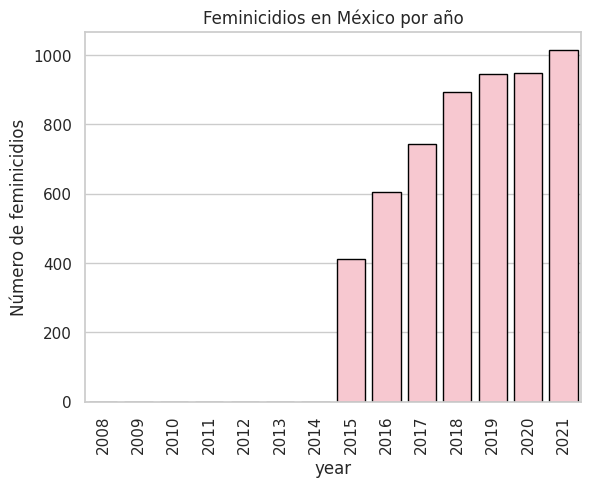

In [ ]:
df_mex['year'].value_counts()
counts = df_mex['year'].value_counts()

ax = sns.barplot(
    x=df_mex['year'],
    y=df_mex['femicides_number'],
    color='pink',edgecolor='black')
ax.set_title('Feminicidios en México por año')
ax.set(ylabel='Número de feminicidios');
ax.tick_params(axis='x', rotation=90)

**Descripción**
La gráfica de barras anterior muestra el número de feminicidios de 2008 a 2021 en México, mostrando que las cifras han ido en aumento con el paso de los años, siendo 2021 el más alto en feminicidios, lo cual también puede ser explicado por el aumento poblacional femenino y el riesgo que conlleva ser mujer en paises de América Latina.

#**MEDIA, MEDIANA, MODA E HISTOGRAMAS**

¿Cómo se encuentran distribuidos nuestros datos?
¿Cuáles son los valores promedio de esperanza de vida, mortalidad materna, Global Peace Index, población femenina y número de feminicidios?

**Media, mediana y moda - POBLACIÓN FEMENINA**

La media poblacional es de 9409032.0995671
La mediana poblacional es de 2956623.0
La moda poblacional es de 23904.0
Media recortada:4,373,306.114
Curtosis: 12.879331537413274
Asimetría: 3.580878682305893



<ipython-input-334-711ea070bf95>:20: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<function matplotlib.pyplot.show(close=None, block=None)>

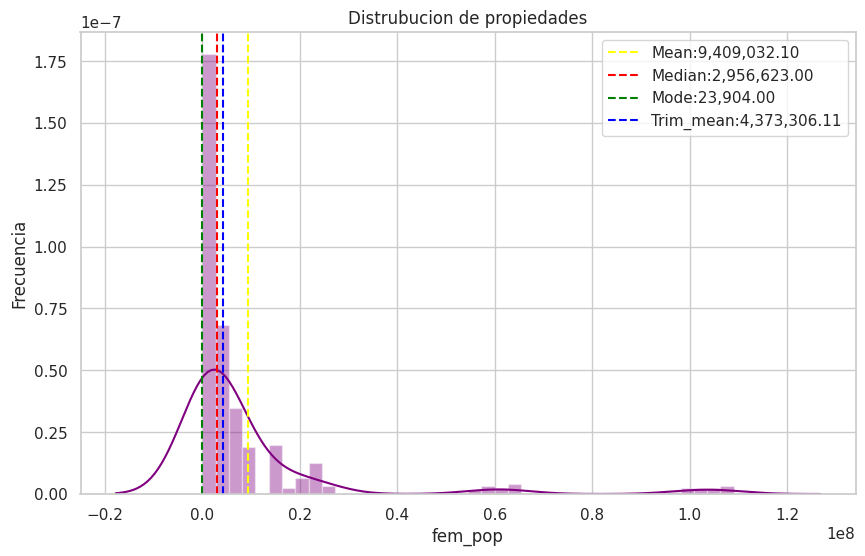

In [ ]:
media=df['fem_pop'].mean()
print(f'La media poblacional es de {media}')

mediana=df['fem_pop'].median()
print(f'La mediana poblacional es de {mediana}')

moda= df['fem_pop'].mode()[0]
print(f'La moda poblacional es de {moda}')

trim_mean=stats.trim_mean(df['fem_pop'], 0.1)
print(f"Media recortada:{trim_mean:,.3f}")

pop=df['fem_pop']
print(f'Curtosis: {kurtosis(pop)}')
print(f'Asimetría: {skew(pop)}')
print("")

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(df["fem_pop"], kde=True, bins=40, color="purple")
plt.axvline(media, color="yellow", linestyle="--", label=f"Mean:{media:,.2f}")
plt.axvline(mediana, color="red", linestyle="--", label=f"Median:{mediana:,.2f}")
plt.axvline(moda, color="green", linestyle="--", label=f"Mode:{moda:,.2f}")
plt.axvline(trim_mean, color="blue", linestyle="--", label=f"Trim_mean:{trim_mean:,.2f}")

plt.title("Distrubucion de propiedades")
plt.xlabel("fem_pop")
plt.ylabel("Frecuencia")
plt.legend()
plt.show


Desviación Estándar

In [ ]:
de=df['fem_pop'].std()
print(f'La desviación estandar de poblacional es de {de}')

La desviación estandar de poblacional es de 20187918.502107143


**INTERPRETACIÓN:** El histograma de la población femenina presenta curtosis positiva. Esto quiere decir que hay dispersión o valores atípicos en nuestros datos. Incluso comparando la media y la media truncada, como tienen valores muy diferentes, podemos notar que hay muchos valores atípicos en nuestros valores de población. Este histograma también posee una curva asimétrica. La media poblacional de mujeres en LATAM es de 9,404,032. La desviación estándar tiene un valor extremadamente alto, lo cual denota que hay dispersión en los datos. Esto hace sentido debido a que se trata de poblaciones de países de distintos tamaños.

**Media, mediana y moda - ESPERANZA DE VIDA**

La media de la esperanza de vida femenina es de 76.44134632034633
La mediana de la esperanza de vida femenina es de 76.6819
La moda de la esperanza de vida femenina es de 75.7071
Media recortada:76.801
Curtosis: 9.795088375228175
Asimetría: -1.8996626473509228


<ipython-input-336-f60ae72efd94>:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




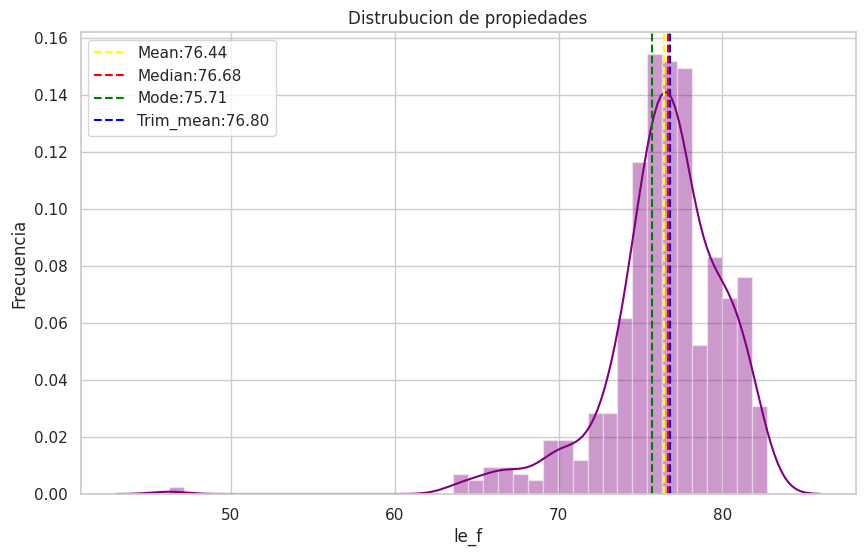

In [ ]:
media=df['le_f'].mean()
print(f'La media de la esperanza de vida femenina es de {media}')

mediana=df['le_f'].median()
print(f'La mediana de la esperanza de vida femenina es de {mediana}')

moda= df['le_f'].mode()[0]
print(f'La moda de la esperanza de vida femenina es de {moda}')

trim_mean=stats.trim_mean(df['le_f'], 0.1)
print(f"Media recortada:{trim_mean:,.3f}")


sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(df["le_f"], kde=True, bins=40, color="purple")
plt.axvline(media, color="yellow", linestyle="--", label=f"Mean:{media:,.2f}")
plt.axvline(mediana, color="red", linestyle="--", label=f"Median:{mediana:,.2f}")
plt.axvline(moda, color="green", linestyle="--", label=f"Mode:{moda:,.2f}")
plt.axvline(trim_mean, color="blue", linestyle="--", label=f"Trim_mean:{trim_mean:,.2f}")

plt.title("Distrubucion de propiedades")
plt.xlabel("le_f")
plt.ylabel("Frecuencia")
plt.legend()
plt.show

lef=df['le_f']
print(f'Curtosis: {kurtosis(lef)}')
print(f'Asimetría: {skew(lef)}')

Desviación Estándar

In [ ]:
de2=df['le_f'].std()
print(f'La desviación estandar de la esperanza de vida es de {de2}')

La desviación estandar de la esperanza de vida es de 3.7190728715124473


**INTERPRETACIÓN:** El histograma de la esperanza de vida femenina presenta curtosis positiva con un valor de 9.79, lo cual indica que hay dispersión en los datos. La curva de este histograma es asimétrica negativa, es decir, su cola se extiende más hacia el lado izquierdo. La esperanza de vida promedio en mujeres latinoamericanas es de 76.44 años. La desviación estándar tiene un valor muy bajo, lo cual denota que los datos de esta categoría se encuentran muy cercanos entre sí

**Media, mediana y moda - MORTALIDAD MATERNA (MMR)**

La media de la mortalidad materna femenina es de 82.4047619047619
La mediana de la mortalidad materna femenina es de 68.0
La moda de la mortalidad materna femenina es de 0.0
Media recortada:68.549


<ipython-input-338-db83d66a56b9>:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Curtosis: 13.758790103522166
Asimetría: 3.4001610902397856


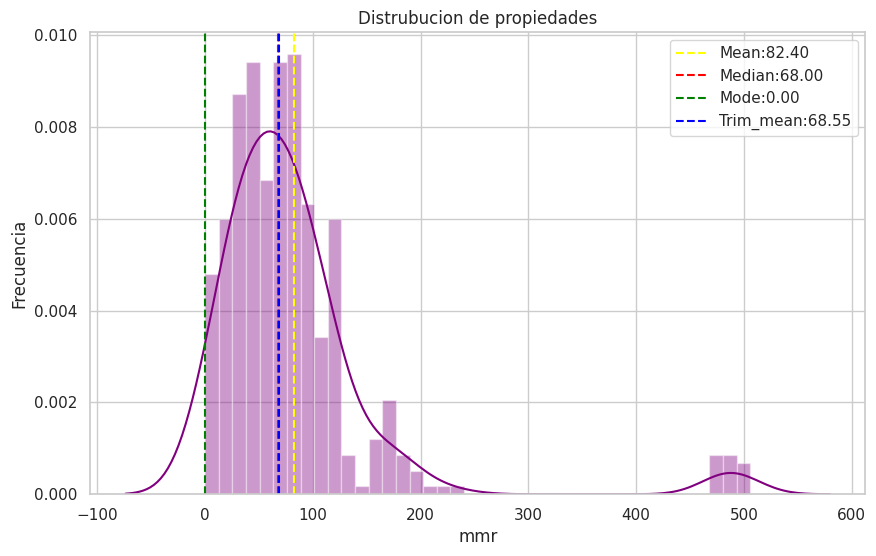

In [ ]:
media=df['mmr'].mean()
print(f'La media de la mortalidad materna femenina es de {media}')

mediana=df['mmr'].median()
print(f'La mediana de la mortalidad materna femenina es de {mediana}')

moda= df['mmr'].mode()[0]
print(f'La moda de la mortalidad materna femenina es de {moda}')

trim_mean=stats.trim_mean(df['mmr'], 0.1)
print(f"Media recortada:{trim_mean:,.3f}")


sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(df["mmr"], kde=True, bins=40, color="purple")
plt.axvline(media, color="yellow", linestyle="--", label=f"Mean:{media:,.2f}")
plt.axvline(mediana, color="red", linestyle="--", label=f"Median:{mediana:,.2f}")
plt.axvline(moda, color="green", linestyle="--", label=f"Mode:{moda:,.2f}")
plt.axvline(trim_mean, color="blue", linestyle="--", label=f"Trim_mean:{trim_mean:,.2f}")

plt.title("Distrubucion de propiedades")
plt.xlabel("mmr")
plt.ylabel("Frecuencia")
plt.legend()
plt.show

mmr=df['mmr']
print(f'Curtosis: {kurtosis(mmr)}')
print(f'Asimetría: {skew(mmr)}')

Desviación Estándar

In [ ]:
de3=df['mmr'].std()
print(f'La desviación estandar de la mortalidad materna es de {de3}')

La desviación estandar de la mortalidad materna es de 84.13682315022974


**INTERPRETACIÓN:** El histograma de la mortalidad materna en LATAM presenta curtosis positiva con un valor de 13.75, lo cual indica que hay mucha dispersión en los datos. La curva de este histograma es asimétrica positiva, es decir, su cola se extiende más hacia el lado derecho. La tasa de mortalidad materna promedio es de 82.4 por cada 100,000 nacimientos de niños vivos. La desviación estándar tiene un valor alto, lo cual denota que hay dispersión en los datos

**Media, mediana y moda - ÍNDICE GLOBAL DE PAZ**

La media del índice global de paz es de 1.423160173160173
La mediana del índice global de paz es de 1.9435

Tomar en cuenta que los rangos entre los que se encuentran los valores van desde 0.0 hasta 2.757
La moda del índice global de paz es de 0.0
Media recortada:1.466
Curtosis: -1.2725338410244014
Asimetría: -0.7058214110687909


<ipython-input-340-4e8b0c20ac93>:21: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




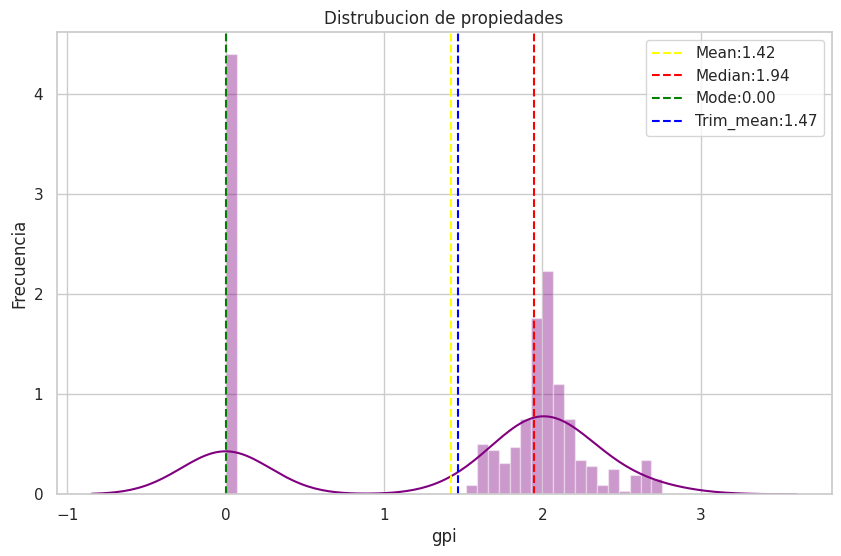

In [ ]:
media=df['gpi'].mean()
print(f'La media del índice global de paz es de {media}')

mediana=df['gpi'].median()
print(f'La mediana del índice global de paz es de {mediana}')

min=df['gpi'].min()
max=df['gpi'].max()
print("")
print(f'Tomar en cuenta que los rangos entre los que se encuentran los valores van desde {min} hasta {max}')

moda= df['gpi'].mode()[0]
print(f'La moda del índice global de paz es de {moda}')

trim_mean=stats.trim_mean(df['gpi'], 0.1)
print(f"Media recortada:{trim_mean:,.3f}")


sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(df["gpi"], kde=True, bins=40, color="purple")
plt.axvline(media, color="yellow", linestyle="--", label=f"Mean:{media:,.2f}")
plt.axvline(mediana, color="red", linestyle="--", label=f"Median:{mediana:,.2f}")
plt.axvline(moda, color="green", linestyle="--", label=f"Mode:{moda:,.2f}")
plt.axvline(trim_mean, color="blue", linestyle="--", label=f"Trim_mean:{trim_mean:,.2f}")

plt.title("Distrubucion de propiedades")
plt.xlabel("gpi")
plt.ylabel("Frecuencia")
plt.legend()
plt.show

gpi=df['gpi']
print(f'Curtosis: {kurtosis(gpi)}')
print(f'Asimetría: {skew(gpi)}')

Desviación Estándar

In [ ]:
de4=df['gpi'].std()
print(f'La desviación estandar del índice de paz global {de4}')

La desviación estandar del índice de paz global 0.9611004743492378


**INTERPRETACIÓN:** El histograma del índice global de paz en LATAM presenta curtosis negativa con un valor de -1.27, lo cual indica que casi no hay dispersión en los datos y se encuentran muy céntricos. En este histograma se observa una distribución bimodal, pues parece haber 2 picos en la gráfica y su asimetría es negativa, su cola se extiende más hacia el lado izquierdo
La media de GPI en países de LATAM es de 1.42. Este número es intermedio, tomando en cuenta que el mínimo en el dataset es 0 y el máximo es 2.76, lo cual puede denotar la inseguridad en países latinoamericanos. La desviación estándar es muy baja, por lo que se observa que los datos se encuentran muy cercanos entre sí.

**Media, mediana y moda - NÚMERO DE FEMINICIDIOS**

La media del índice global de paz es de 70.6948051948052
La mediana del índice global de paz es de 0.0

Tomar en cuenta que los rangos entre los que se encuentran los valores van desde 0.0 hasta 2048.0
La moda del índice global de paz es de 0.0


<ipython-input-342-e5c30ad549bd>:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Curtosis: 40.558773979883945
Asimetría: 6.0248563981528935


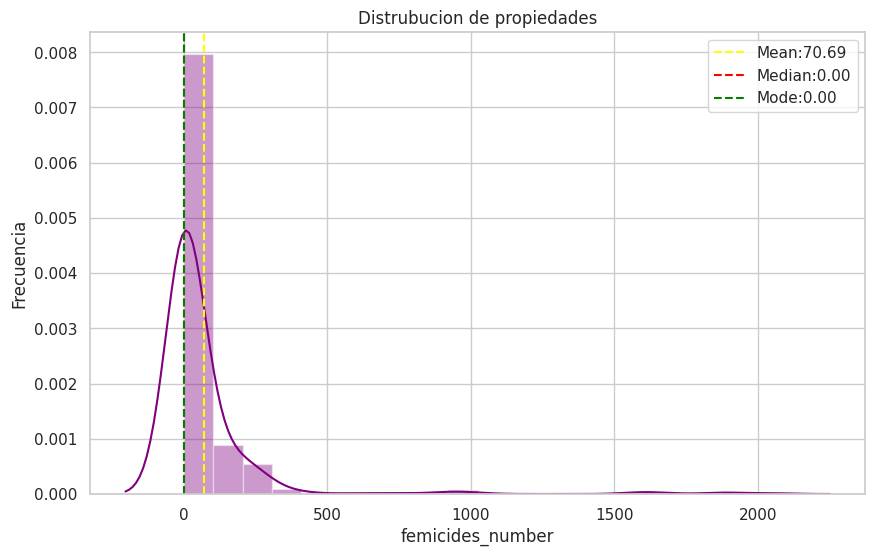

In [ ]:
media=df['femicides_number'].mean()
print(f'La media del índice global de paz es de {media}')

mediana=df['femicides_number'].median()
print(f'La mediana del índice global de paz es de {mediana}')

min=df['femicides_number'].min()
max=df['femicides_number'].max()
print("")
print(f'Tomar en cuenta que los rangos entre los que se encuentran los valores van desde {min} hasta {max}')

moda= df['femicides_number'].mode()[0]
print(f'La moda del índice global de paz es de {moda}')

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(df["femicides_number"], kde=True, bins=20, color="purple")
plt.axvline(media, color="yellow", linestyle="--", label=f"Mean:{media:,.2f}")
plt.axvline(mediana, color="red", linestyle="--", label=f"Median:{mediana:,.2f}")
plt.axvline(moda, color="green", linestyle="--", label=f"Mode:{moda:,.2f}")

plt.title("Distrubucion de propiedades")
plt.xlabel("femicides_number")
plt.ylabel("Frecuencia")
plt.legend()
plt.show

femicides_number=df['femicides_number']
print(f'Curtosis: {kurtosis(femicides_number)}')
print(f'Asimetría: {skew(femicides_number)}')

Desviación Estándar

In [ ]:
de1=df['femicides_number'].std()
print(f'La desviación estandar del número de feminicidios es de {de1}')

La desviación estandar del número de feminicidios es de 230.666214074989


**INTERPRETACIÓN:** El histograma del índice global de paz en LATAM presenta curtosis positiva alta con un valor de 40.55, lo cual indica que hay mucha dispersión en los datos. Este histograma tiene asimetría positiva de 6, su cola se extiende más hacia el lado derecho
La media de feminicidios en países de LATAM es de 70.69. La desviación estándar es alta, lo cual indica dispersión en los valores.

#**PERCENTILES**

En esta sección se revisa la distribución de los datos por cuartil

**Percentiles y distribución de los datos - POBLACIÓN FEMENINA**

In [ ]:
print(f'Valor mínimo: {df["fem_pop"].min()}')
print(f'Percentil 10: {df["fem_pop"].quantile(0.1)}')
print(f'Percentil 25: {df["fem_pop"].quantile(0.25)}')
print(f'Percentil 50: {df["fem_pop"].median()}')
print(f'Percentil 75: {df["fem_pop"].quantile(0.75)}')
print(f'Percentil 90: {df["fem_pop"].quantile(0.9)}')
print(f'Valor máximo: {df["fem_pop"].max()}')

Valor mínimo: 23904.0
Percentil 10: 51541.1
Percentil 25: 198057.5
Percentil 50: 2956623.0
Percentil 75: 7696662.25
Percentil 90: 22117727.500000004
Valor máximo: 109034931.0


**INTERPRETACIÓN:** Lo que se puede interpretar con los percentiles calculados anteriormente es, de manera general, que el 50% de los datos, es decir, la mediana, se encuentran por debajo de de **2,956,623.0**. El 75% de los datos se encuentra por debajo de **7,696,662.25**, y el 90% de los datos se encuentra por debajo de **22,117,727.5**.

**Percentiles y distribución de los datos - ESPERANZA DE VIDA**

In [ ]:
print(f'Valor mínimo: {df["le_f"].min()}')
print(f'Percentil 10: {df["le_f"].quantile(0.1)}')
print(f'Percentil 25: {df["le_f"].quantile(0.25)}')
print(f'Percentil 50: {df["le_f"].median()}')
print(f'Percentil 75: {df["le_f"].quantile(0.75)}')
print(f'Percentil 90: {df["le_f"].quantile(0.9)}')
print(f'Valor máximo: {df["le_f"].max()}')

Valor mínimo: 46.2514
Percentil 10: 72.44005
Percentil 25: 74.99195
Percentil 50: 76.6819
Percentil 75: 78.825125
Percentil 90: 80.73410000000001
Valor máximo: 82.7112


**INTERPRETACIÓN:** Lo que se puede interpretar con los percentiles calculados anteriormente es, de manera general, que el 50% de los datos se encuentran por debajo de de **76.6**. Como se puede observar, cada uno de los percentiles tuvo resultados muy similares, lo cual puede significar que los valores están muy cercanos entre sí y no varían mucho de país en país

**Percentiles y distribución de los datos - MORTALIDAD MATERNA**

In [ ]:
print(f'Valor mínimo: {df["mmr"].min()}')
print(f'Percentil 10: {df["mmr"].quantile(0.1)}')
print(f'Percentil 25: {df["mmr"].quantile(0.25)}')
print(f'Percentil 50: {df["mmr"].median()}')
print(f'Percentil 75: {df["mmr"].quantile(0.75)}')
print(f'Percentil 90: {df["mmr"].quantile(0.9)}')
print(f'Valor máximo: {df["mmr"].max()}')

Valor mínimo: 0.0
Percentil 10: 17.1
Percentil 25: 38.0
Percentil 50: 68.0
Percentil 75: 98.0
Percentil 90: 133.7000000000001
Valor máximo: 506.0


**INTERPRETACIÓN:** Lo que se puede interpretar con los percentiles calculados anteriormente es, de manera general, que el 50% de los datos se encuentran por debajo de de **68**. El percentil 90 se encuentra muy alejado del valor máximo, por lo que se deduce que probablemente hay muchos valores atípicos

**Percentiles y distribución de los datos - GLOBAL PEACE INDEX**

In [ ]:
print(f'Valor mínimo: {df["gpi"].min()}')
print(f'Percentil 10: {df["gpi"].quantile(0.1)}')
print(f'Percentil 25: {df["gpi"].quantile(0.25)}')
print(f'Percentil 50: {df["gpi"].median()}')
print(f'Percentil 75: {df["gpi"].quantile(0.75)}')
print(f'Percentil 90: {df["gpi"].quantile(0.9)}')
print(f'Valor máximo: {df["gpi"].max()}')

Valor mínimo: 0.0
Percentil 10: 0.0
Percentil 25: 0.0
Percentil 50: 1.9435
Percentil 75: 2.065
Percentil 90: 2.2463
Valor máximo: 2.757


**INTERPRETACIÓN:** Lo que se puede interpretar con los percentiles calculados anteriormente es, de manera general, que el 50% de los datos se encuentran por debajo de **1.9435**. El percentil 90 se encuentra muy cercano del valor máximo, por lo que se deduce que probablemente no hay valores atípicos

**Percentiles y distribución de los datos - GLOBAL PEACE INDEX**

In [ ]:
print(f'Valor mínimo: {df["femicides_number"].min()}')
print(f'Percentil 10: {df["femicides_number"].quantile(0.1)}')
print(f'Percentil 25: {df["femicides_number"].quantile(0.25)}')
print(f'Percentil 50: {df["femicides_number"].median()}')
print(f'Percentil 75: {df["femicides_number"].quantile(0.75)}')
print(f'Percentil 90: {df["femicides_number"].quantile(0.9)}')
print(f'Valor máximo: {df["femicides_number"].max()}')

Valor mínimo: 0.0
Percentil 10: 0.0
Percentil 25: 0.0
Percentil 50: 0.0
Percentil 75: 31.0
Percentil 90: 187.90000000000003
Valor máximo: 2048.0


**INTERPRETACIÓN:** Lo que se puede interpretar con los percentiles calculados anteriormente es, de manera general, que el 50% de los datos son 0s. El percentil 90 se encuentra muy cercano del valor máximo, por lo que se deduce que probablemente hay valores atípicos

#**BOXPLOTS**
En los boxplots y violinplots que se calculan a continuación, podemos observar la distribución de nuestros datos por cuartiles. También, con estos gráficos podemos observar aquellos valores que son atípicos y cuántos son. A continuación se muestran las interpretaciones para cada uno

###**INTERPRETACIONES**

**Población femenil:**
Este primer boxplot muestra una enorme cantidad de valores atípicos, aquellos que están fuera de los bigotes. Esto se debe a que los valores de población por país son muy grandes y varían en gran medida. Si calculamos el rango intercuartílico y filtramos estos datos anormales, obtenemos un segundo boxplot en el que los datos atípicos desaparecen en su mayoría. El IQR obtenido tiene un valor de 7498604.75, eso quiere decir que el 50% de nuestros datos se encuentran en ese intervalo representado por la caja rosa

**Esperanza de vida:**
La filtración del boxplot en base al IQR muestra en el segundo boxplot que muchos de los valores fuera de los bigotes eran atípicos. Dado que el IQR es muy bajo, puede indicar que hay asimetría en su curva de distribución.

**Tasa de mortalidad materna:**
El boxplot muestra muchos valores atípicos bastante alejados de la mediana. Al filtrar estos datos, se puede observar en el boxplot de en medio mejor la concentración del 50% los datos.

**Global Peace Index:**
Se graficaron los boxplots original y filtrado y se observa que no hay valores atípicos. El rango intercuartílico tiene un valor de 2.065, lo cual nos permite suponer que los valores no están dispersos

**Número de feminicidios:**
El boxplot original muestra cómo el 50% de los datos están concentrados cerca del 0. Esto se debe a que en el dataset, la mitad de los valores son 0 en esta columna. Después de filtrar el boxplot con el IQR, los valores de 0 desaparecen casi por completo.



RANGO INTERCUARTÍLICO: 7498604.75


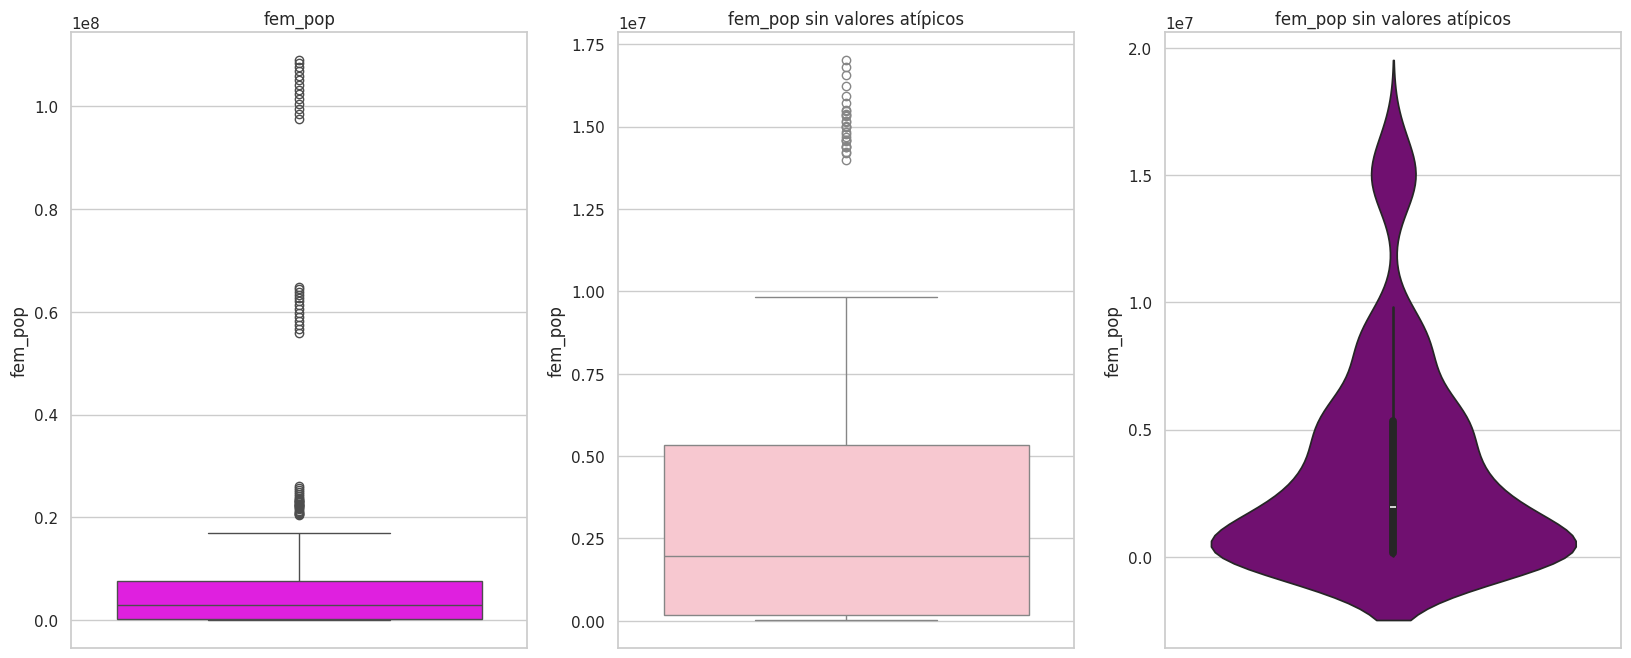

In [ ]:
iqr = df['fem_pop'].quantile(0.75) - df['fem_pop'].quantile(0.25)
filtro_inferior = df['fem_pop'] > df['fem_pop'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['fem_pop'] < df['fem_pop'].quantile(0.75) + (iqr * 1.5)
df_filtrado = df[filtro_inferior & filtro_superior]
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
sns.boxplot(data=df['fem_pop'],color = "magenta")
plt.title('fem_pop')



plt.subplot(1, 3, 2)
sns.boxplot(data=df_filtrado['fem_pop'] ,color = "pink")

plt.title('fem_pop sin valores atípicos')

plt.subplot(1, 3, 3)
sns.violinplot(data=df_filtrado['fem_pop'],color = "purple")
plt.title('fem_pop sin valores atípicos')

print(f'RANGO INTERCUARTÍLICO: {iqr}')

RANGO INTERCUARTÍLICO: 3.833174999999997


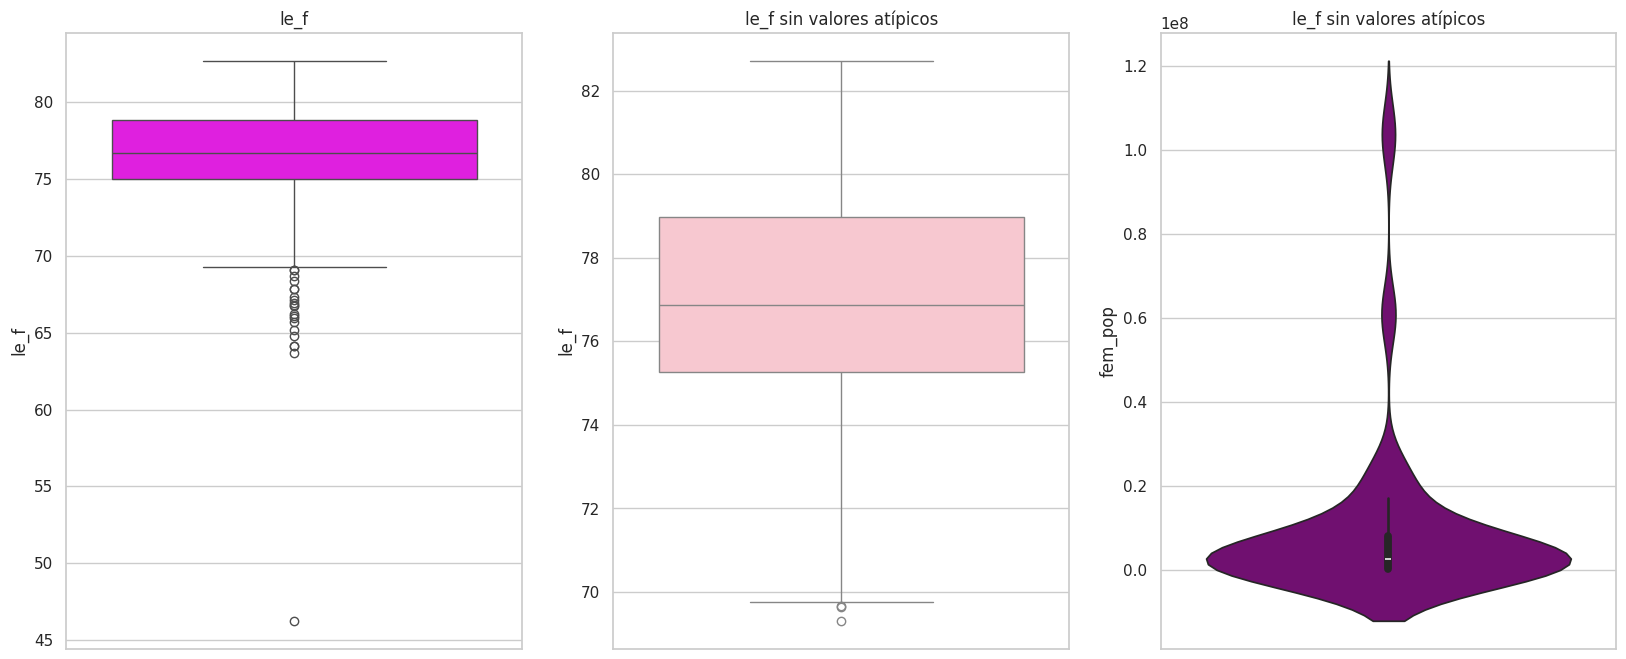

In [ ]:
iqr = df['le_f'].quantile(0.75) - df['le_f'].quantile(0.25)
filtro_inferior = df['le_f'] > df['le_f'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['le_f'] < df['le_f'].quantile(0.75) + (iqr * 1.5)
df_filtrado = df[filtro_inferior & filtro_superior]
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
sns.boxplot(data=df['le_f'],color = "magenta")
plt.title('le_f')


plt.subplot(1, 3, 2)
sns.boxplot(data=df_filtrado['le_f'],color = "pink")
plt.title('le_f sin valores atípicos')

plt.subplot(1, 3, 3)
sns.violinplot(data=df_filtrado['fem_pop'],color = "purple")
plt.title('le_f sin valores atípicos')

print(f'RANGO INTERCUARTÍLICO: {iqr}')

RANGO INTERCUARTÍLICO: 60.0


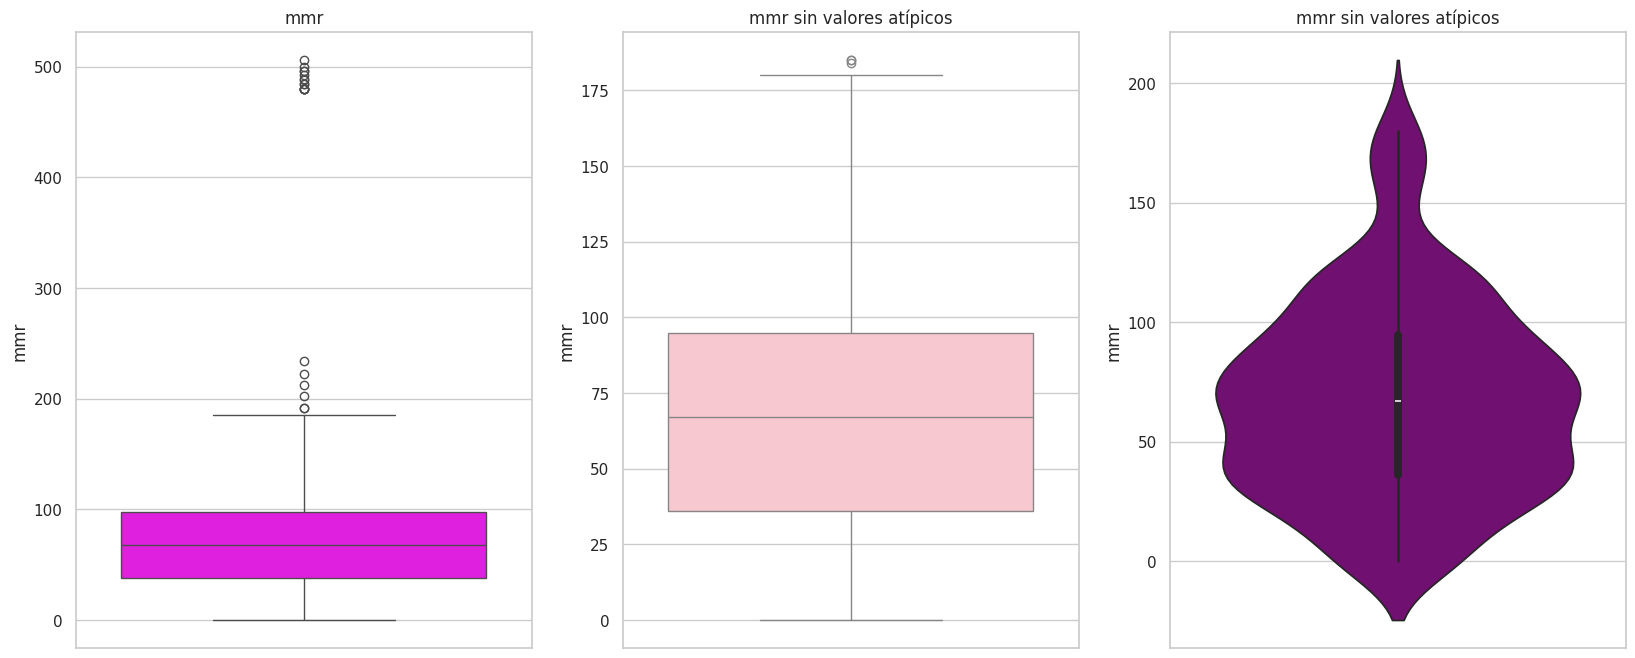

In [ ]:
iqr = df['mmr'].quantile(0.75) - df['mmr'].quantile(0.25)
filtro_inferior = df['mmr'] > df['mmr'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['mmr'] < df['mmr'].quantile(0.75) + (iqr * 1.5)
df_filtrado = df[filtro_inferior & filtro_superior]
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
sns.boxplot(data=df['mmr'],color = "magenta")
plt.title('mmr')


plt.subplot(1, 3, 2)
sns.boxplot(data=df_filtrado['mmr'],color = "pink")
plt.title('mmr sin valores atípicos')

plt.subplot(1, 3, 3)
sns.violinplot(data=df_filtrado['mmr'],color = "purple")
plt.title('mmr sin valores atípicos')

print(f'RANGO INTERCUARTÍLICO: {iqr}')

RANGO INTERCUARTÍLICO: 2.065


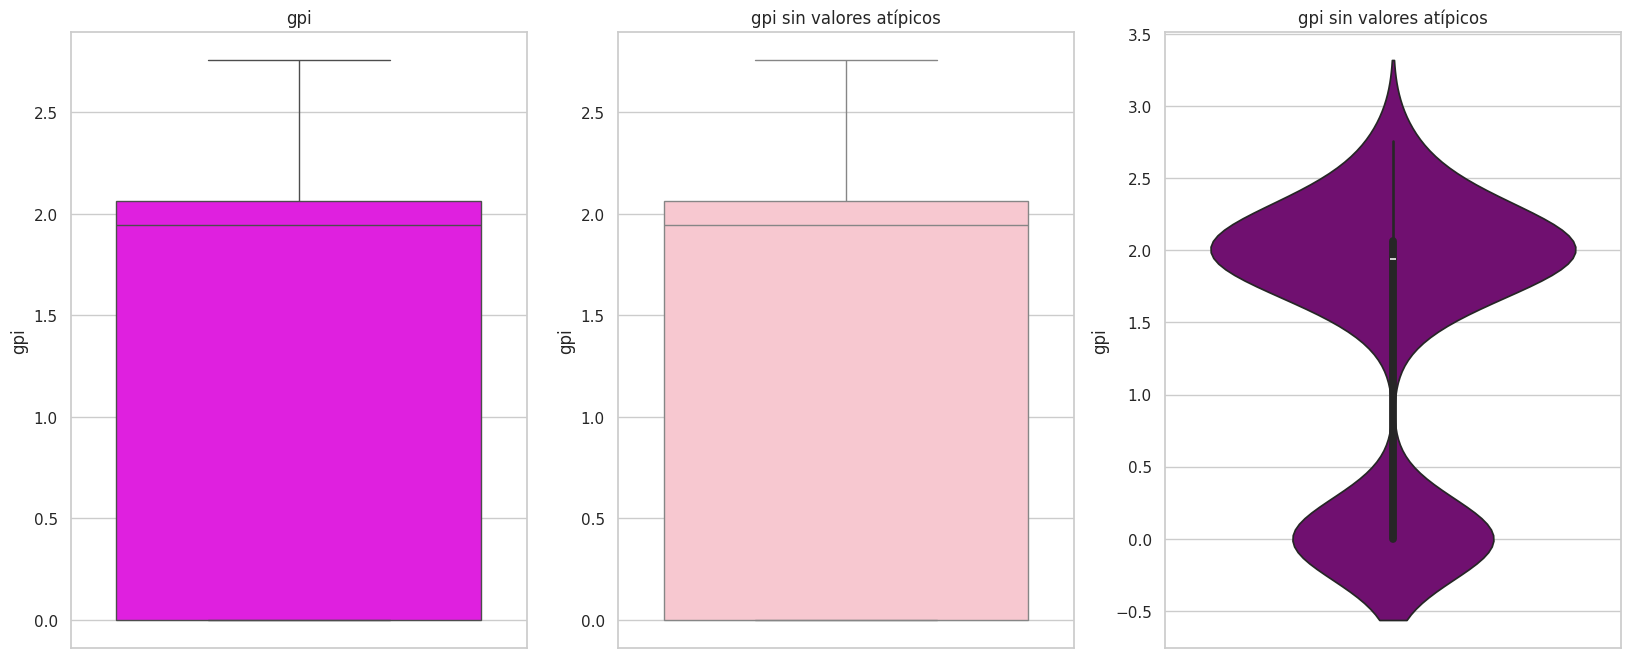

In [ ]:
iqr = df['gpi'].quantile(0.75) - df['gpi'].quantile(0.25)
filtro_inferior = df['gpi'] > df['gpi'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['gpi'] < df['gpi'].quantile(0.75) + (iqr * 1.5)
df_filtrado = df[filtro_inferior & filtro_superior]
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
sns.boxplot(data=df['gpi'],color = "magenta")
plt.title('gpi')


plt.subplot(1, 3, 2)
sns.boxplot(data=df_filtrado['gpi'],color = "pink")
plt.title('gpi sin valores atípicos')

plt.subplot(1, 3, 3)
sns.violinplot(data=df_filtrado['gpi'],color = "purple")
plt.title('gpi sin valores atípicos')

print(f'RANGO INTERCUARTÍLICO: {iqr}')

RANGO INTERCUARTÍLICO: 31.0


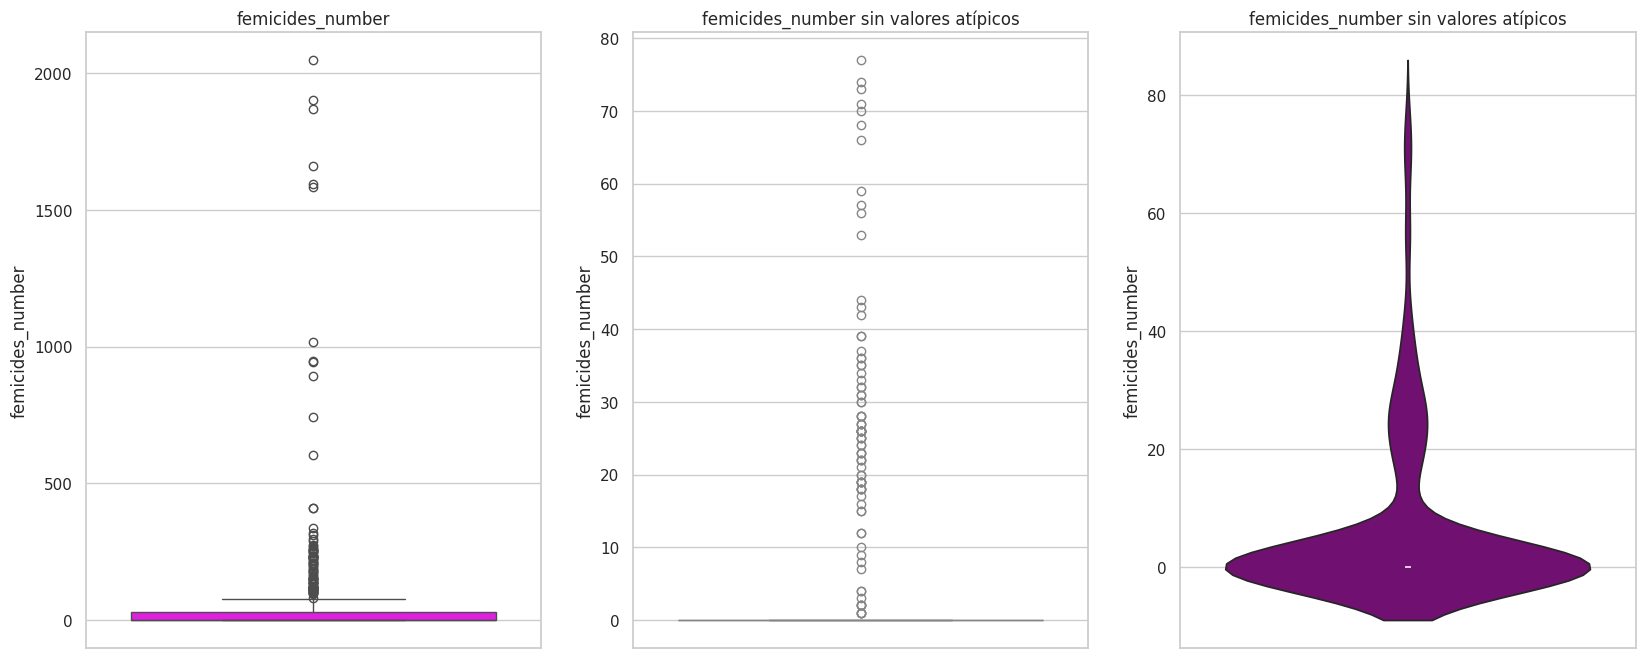

In [ ]:

iqr = df['femicides_number'].quantile(0.75) - df['femicides_number'].quantile(0.25)
filtro_inferior = df['femicides_number'] > df['femicides_number'].quantile(0.25) - (iqr * 1.5)
filtro_superior = df['femicides_number'] < df['femicides_number'].quantile(0.75) + (iqr * 1.5)
df_filtrado = df[filtro_inferior & filtro_superior]
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
sns.boxplot(data=df['femicides_number'],color = "magenta")
plt.title('femicides_number')


plt.subplot(1, 3, 2)
sns.boxplot(data=df_filtrado['femicides_number'],color = "pink")
plt.title('femicides_number sin valores atípicos')

plt.subplot(1, 3, 3)
sns.violinplot(data=df_filtrado['femicides_number'],color = "purple")
plt.title('femicides_number sin valores atípicos')

print(f'RANGO INTERCUARTÍLICO: {iqr}')

# **CORRELACIÓN**

In [ ]:
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-354-f471181e404f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,year,le_f,fem_pop,mmr,gpi,femicides_number
year,1.000000,0.069838,0.019472,-0.052385,0.022454,0.212089
le_f,0.069838,1.000000,0.090488,-0.750827,-0.050222,0.038038
fem_pop,0.019472,0.090488,1.000000,-0.057145,0.361352,0.627123
mmr,-0.052385,-0.750827,-0.057145,1.000000,0.246717,-0.068007
gpi,0.022454,-0.050222,0.361352,0.246717,1.000000,0.254593
femicides_number,0.212089,0.038038,0.627123,-0.068007,0.254593,1.000000


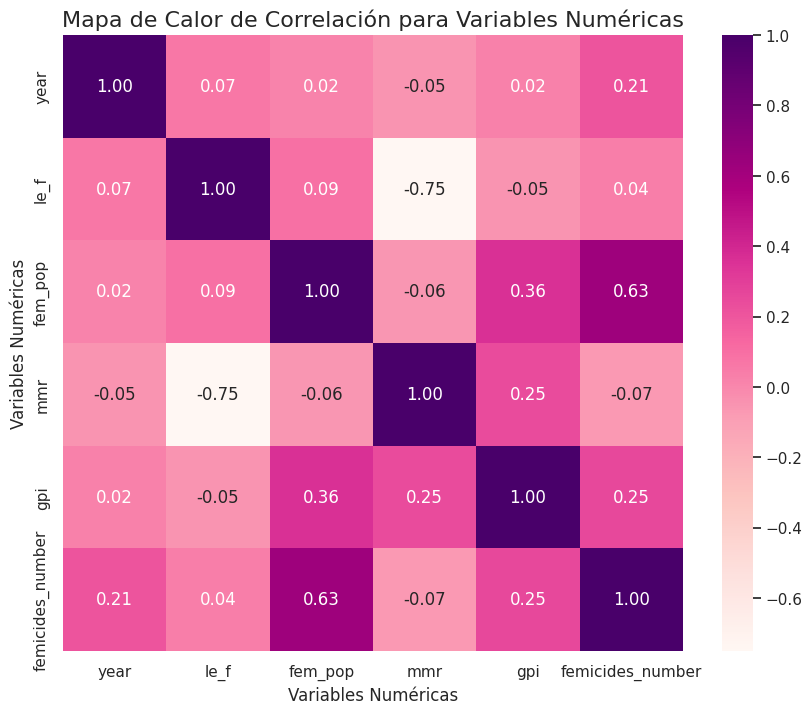

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdPu")
plt.title("Mapa de Calor de Correlación para Variables Numéricas", fontsize=16)
plt.xlabel("Variables Numéricas")
plt.ylabel("Variables Numéricas")
plt.show()
#Con todas las variables

**INTERPRETACIÓN:** Con este heatmap se pretende observar la correlación entre cada una de nuestras variables numéricas.

Los valores que tienen una mayor correlación se muestran a continuación:

1.   ***Población femenina & Número de Feminicidios:*** tienen una **correlación positiva alta** de 0.63. Se traduce en que mientras aumenta la población femenina, más feminicidios ocurren en ese país.
2.   ***Población femenina & Global Peace Index:*** tienen una **correlación positiva moderada** de 0.36. La correlación no es tan alta, sin embargo demuestra cierta relación entre ambas variables. Si una aumenta, la otra es generalmente también aumentada
3.   ***Esperanza de vida & Tasa de mostalidad materna:*** estas dos variables tienen una **correlación negativa** de -0.75. Esto puede significar que mientras mayor sea la tasa de mortalidad, menor es la esperanza de vida en mujeres



In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
mask

<ipython-input-356-be371d7477a5>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



array([[ True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True]])

<ipython-input-357-8f0c7b993afc>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



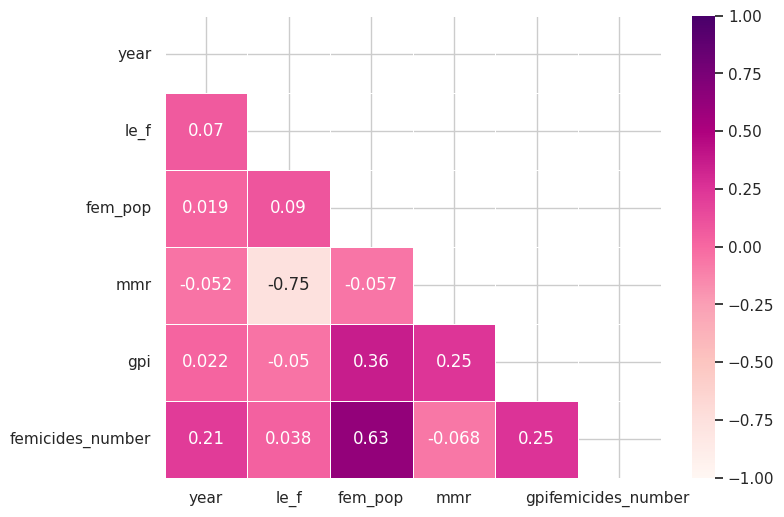

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df.corr(),mask=mask, vmin=-1, vmax=1, annot=True, cmap="RdPu", linewidths=.5)
plt.show()
#Agregar mascara para  que no repita datos

**Descripción**
Este treemap cuenta con una máscara la cual permite que no se visualicen datos repetidos.

In [ ]:
pip install pingouin

In [ ]:
import pingouin as pg

A continuación se muestra una tabla con los coeficientes de Pearson, que nos permiten saber la correlación entre dos variables. Se toman en cuenta todas las variables numéricas, así como la de año.

Se puede intuir por los coeficientes de Pearson que:



*   Hay una correlación baja pero positiva entre el año y el número de feminicidios, indicando que conforme pasa el tiempo, es posible que los feminicidios aumenten.
*   El coeficiente de Pearson mayor es el dado por las variables fem_pop y femicides_number



In [ ]:
pg.pairwise_corr(df, columns=['year','fem_pop','le_f','mmr','gpi','femicides_number'], method='pearson')

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,year,fem_pop,pearson,two-sided,462,0.019472,"[-0.07, 0.11]",6.763538e-01,0.064,0.070171
1,year,le_f,pearson,two-sided,462,0.069838,"[-0.02, 0.16]",1.339034e-01,0.179,0.323042
2,year,mmr,pearson,two-sided,462,-0.052385,"[-0.14, 0.04]",2.611469e-01,0.109,0.202676
3,year,gpi,pearson,two-sided,462,0.022454,"[-0.07, 0.11]",6.302498e-01,0.065,0.076928
4,year,femicides_number,pearson,two-sided,462,0.212089,"[0.12, 0.3]",4.250151e-06,2203.114,0.996076
5,fem_pop,le_f,pearson,two-sided,462,0.090488,"[-0.0, 0.18]",5.193236e-02,0.383,0.494385
6,fem_pop,mmr,pearson,two-sided,462,-0.057145,"[-0.15, 0.03]",2.202122e-01,0.123,0.232405
7,fem_pop,gpi,pearson,two-sided,462,0.361352,"[0.28, 0.44]",1.070757e-15,4.808e+12,1.000000
8,fem_pop,femicides_number,pearson,two-sided,462,0.627123,"[0.57, 0.68]",7.217782e-52,2.906e+48,1.000000
9,le_f,mmr,pearson,two-sided,462,-0.750827,"[-0.79, -0.71]",6.840158e-85,1.848e+81,1.000000


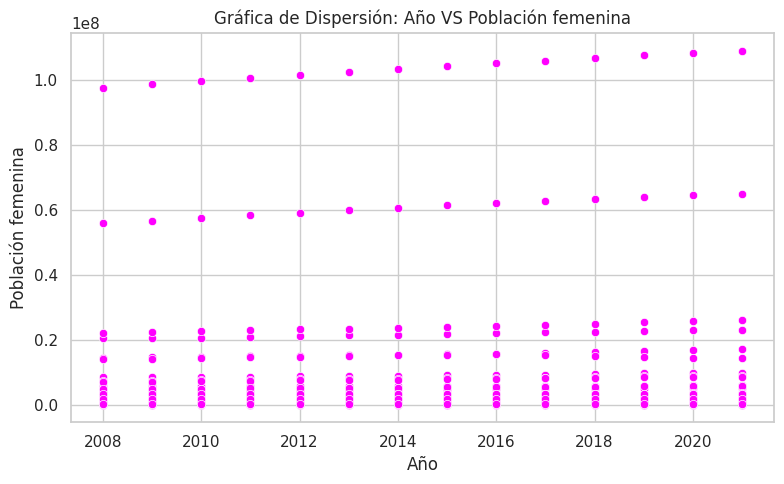

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='year', y='fem_pop', c="magenta")
plt.xlabel('Año')
plt.ylabel('Población femenina')
plt.title('Gráfica de Dispersión: Año VS Población femenina')
plt.tight_layout()
plt.show()

**INTERPRETACIÓN:** La población incrementa ligeramente año con año

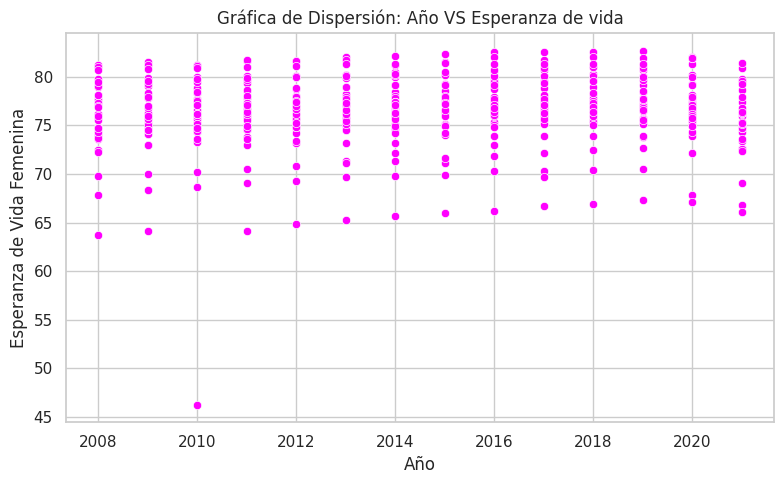

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='year', y='le_f', c="magenta")
plt.xlabel('Año')
plt.ylabel('Esperanza de Vida Femenina')
plt.title('Gráfica de Dispersión: Año VS Esperanza de vida')
plt.tight_layout()
plt.show()

**INTERPRETACIÓN:** Se ve poca variación de la esperanza de vida con el tiempo. Se interpreta que la esperanza de vida ha permanecido constante desde el 2008 hasta el 2020

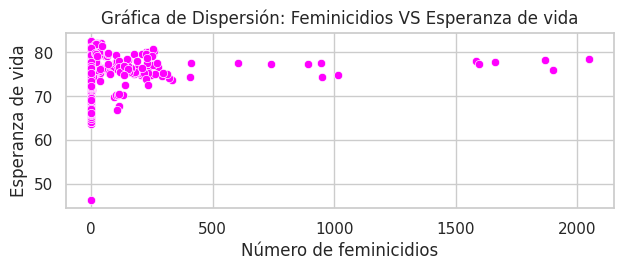

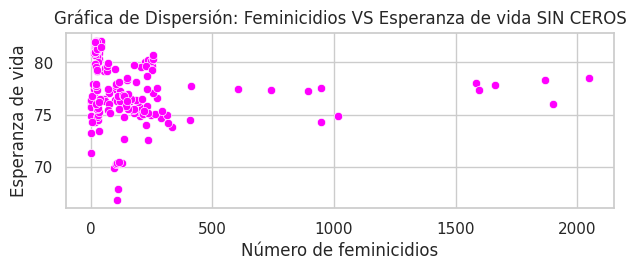

CORRELACIÓN:


0.03803833065598339

In [ ]:
plt.subplot(2, 1, 1)
#plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='femicides_number', y='le_f', c="magenta")
plt.xlabel('Número de feminicidios')
plt.ylabel('Esperanza de vida')
plt.title('Gráfica de Dispersión: Feminicidios VS Esperanza de vida')
plt.tight_layout()
plt.show()

df_no_zeros = df[df['femicides_number'] > 0]
plt.subplot(2, 1, 2)
#plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_no_zeros, x='femicides_number', y='le_f', c="magenta")
plt.xlabel('Número de feminicidios')
plt.ylabel('Esperanza de vida')
plt.title('Gráfica de Dispersión: Feminicidios VS Esperanza de vida SIN CEROS')
plt.tight_layout()
plt.show()


print("CORRELACIÓN:")
df['femicides_number'].corr(df['le_f'])

**INTERPRETACIÓN:** Se realiza el gráfico de dispersión y posteriormente se aplica un filtro para eliminar los 0s. Los datos muestran una aglomeración entre los 0 y 400 feminicidios, pero aún con el filtro, la dispersión se mantiene

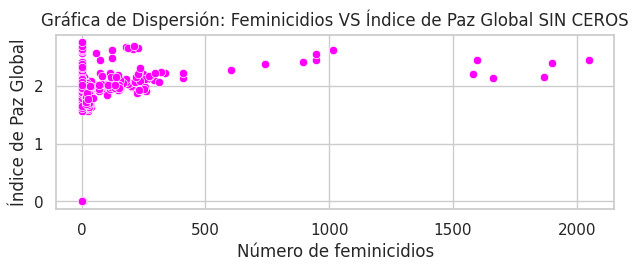

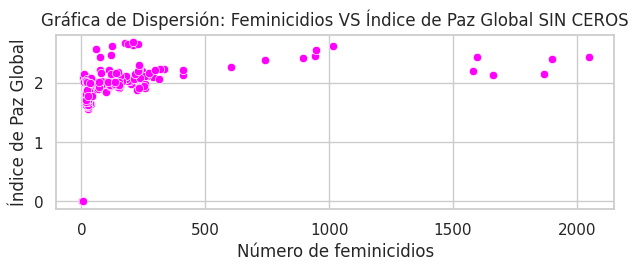

CORRELACIÓN:


0.2545930362400674

In [ ]:
plt.subplot(2, 1, 1)
#plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='femicides_number', y='gpi', c="magenta")
plt.xlabel('Número de feminicidios')
plt.ylabel('Índice de Paz Global')
plt.title('Gráfica de Dispersión: Feminicidios VS Índice de Paz Global SIN CEROS')
plt.tight_layout()
plt.show()

df_no_zeros = df[df['femicides_number'] > 0]
plt.subplot(2, 1, 2)
#plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_no_zeros, x='femicides_number', y='gpi', c="magenta")
plt.xlabel('Número de feminicidios')
plt.ylabel('Índice de Paz Global')
plt.title('Gráfica de Dispersión: Feminicidios VS Índice de Paz Global SIN CEROS')
plt.tight_layout()
plt.show()

print("CORRELACIÓN:")
df['femicides_number'].corr(df['gpi'])

**INTERPRETACIÓN:** En este gráfico se observa que hay mucha dispersión incluso después de aplicar el filtro de 0s.

#**REGRESIÓN LINEAL**

Pairplots

**Descripción:**

A continuación se muestra un parploit dónde podemos visualizar algo similar al heatmap de la correlación pero en este caso el parploit nos muestra la distribución de nuestras variables tal como lo haría de manera individual un gráfico de dispersión.

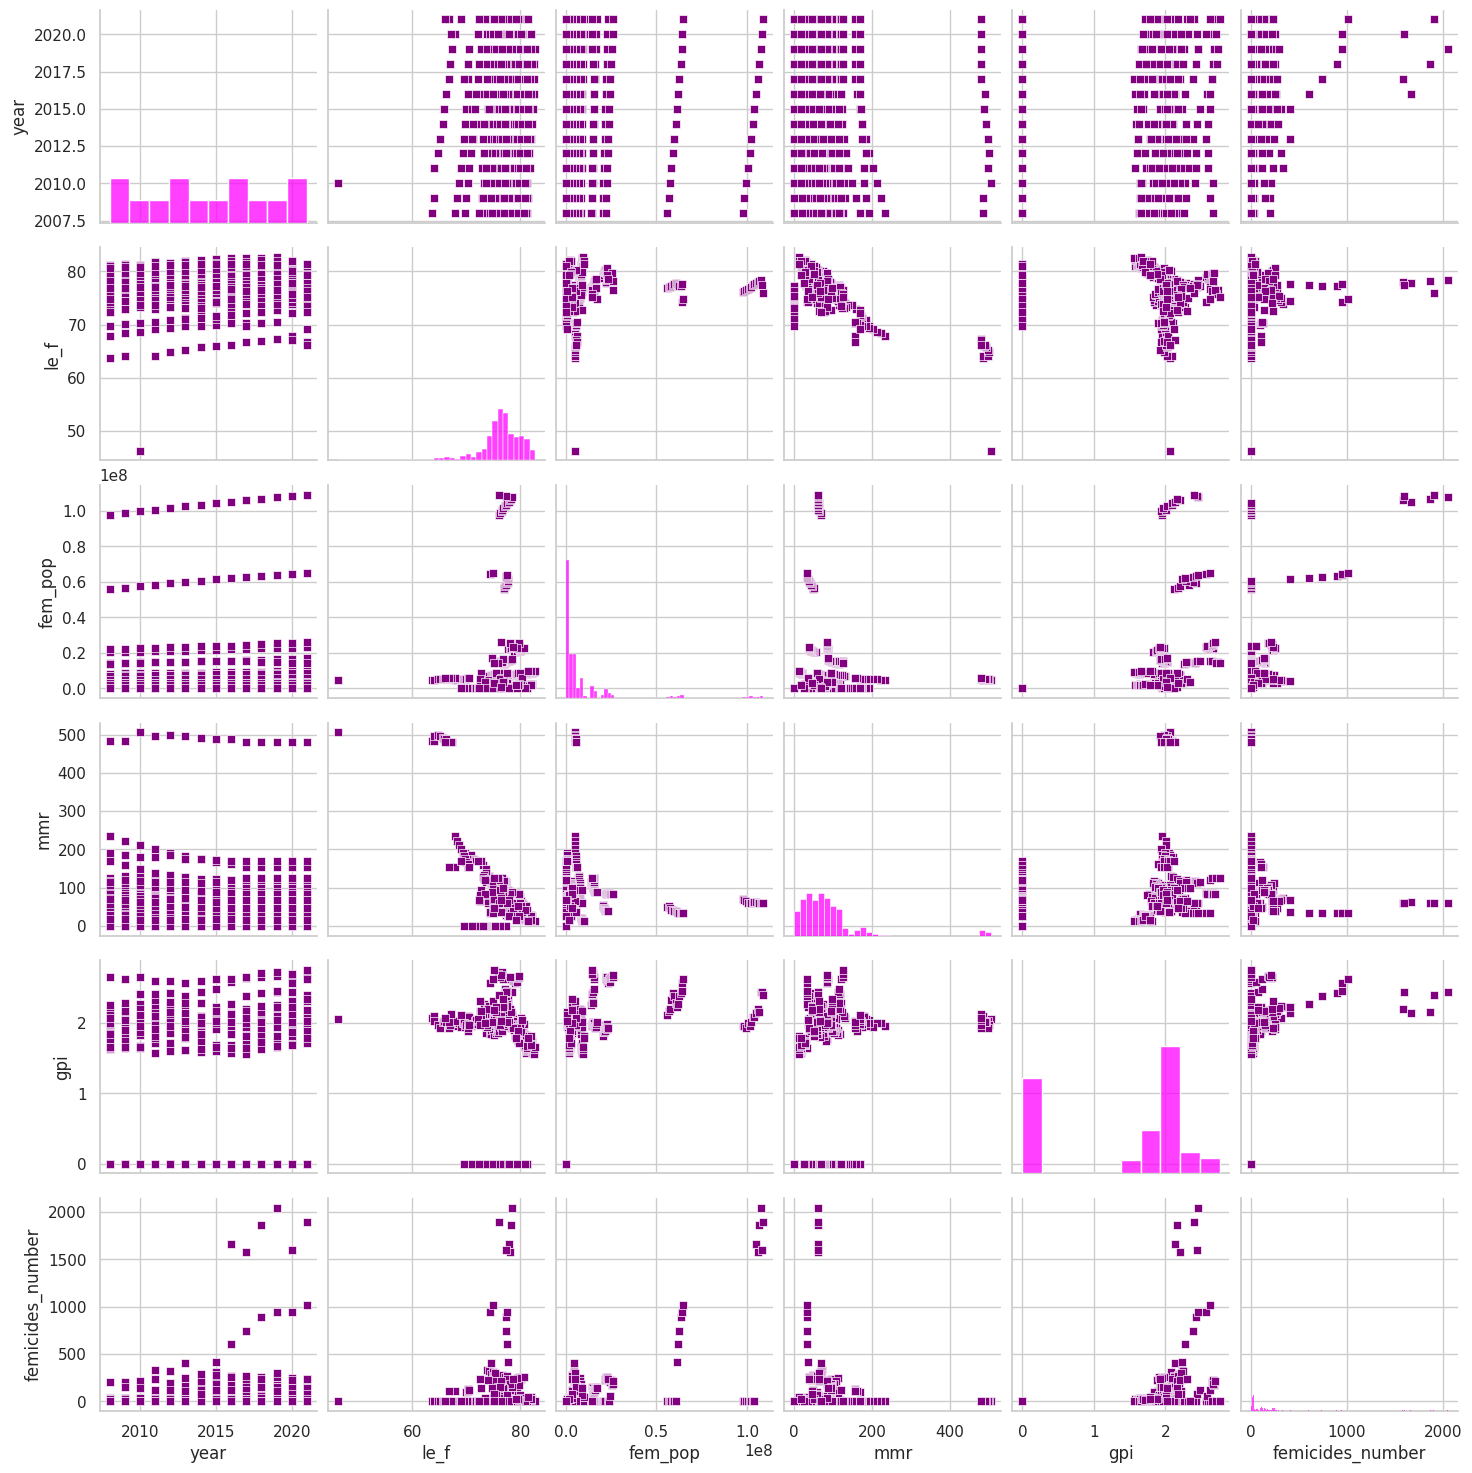

In [ ]:
sns.pairplot(df,   plot_kws = {'color': 'purple', 'marker': 's'},
             diag_kws = {'color': 'magenta'})

Entrenamiento de modelo de Regresión

**Descripción**

Se realizó un modelo de regresión donde consideramos las variables que tuvieron la correlación más alta: ***mmr*** y ***le_f***, las cuales representan a la Mortalidad por Maternidad y la Esperanza de Vida.

In [ ]:
from sklearn.linear_model import LinearRegression
#llamanos a la libreria

In [ ]:
df['le_f'].corr(df['mmr'])

-0.7508274774647608

In [ ]:
lr = LinearRegression()
lr.fit(df['le_f'].to_frame(),df['mmr'])

LinearRegression()

In [ ]:
y_predict = lr.predict(df['le_f'].to_frame())

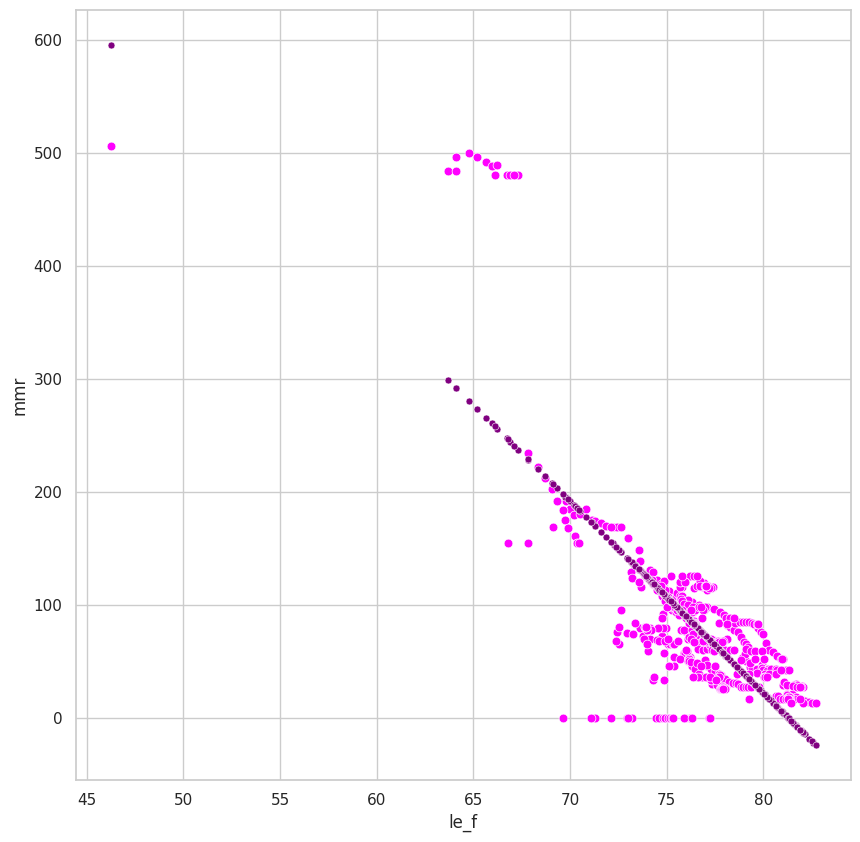

In [ ]:
plt.rcParams["figure.figsize"] = (10, 10)
sns.scatterplot(x=df['le_f'], y=df['mmr'], s=40, c="magenta");
sns.scatterplot(x=df['le_f'], y=y_predict, s=25,c="purple");

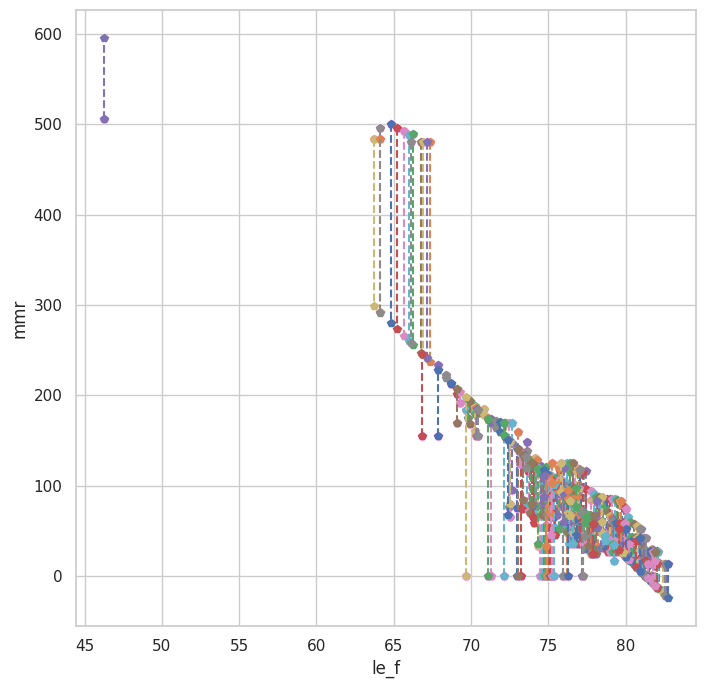

In [ ]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x=df['le_f'], y=df['mmr'], s=40, c="magenta");
sns.scatterplot(x=df['le_f'], y=y_predict, s=25,c="purple");

for i in range(len(df['le_f'])):
    plt.plot([df['le_f'][i], df['le_f'][i]], [df['mmr'][i], y_predict[i]], 'p--')
    #para ver la distancia entre el valor predicho y el real

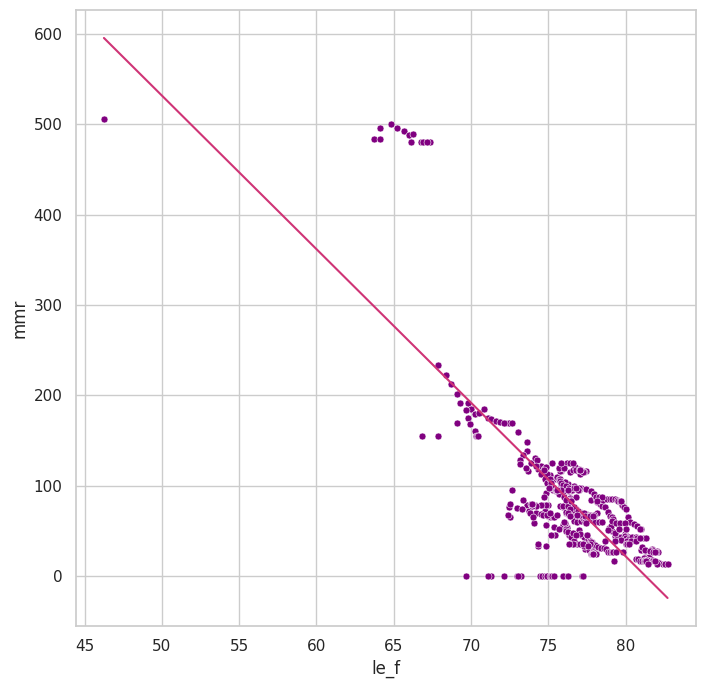

In [ ]:
plt.rcParams["figure.figsize"] = (8, 8)

sns.scatterplot(x=df['le_f'], y=df['mmr'], s=25,c="purple");
sns.lineplot(x=df['le_f'], y=y_predict, color='#cf3476');

In [ ]:
intercept = lr.intercept_
#da el valor de b
coefficient = lr.coef_[0]
#da el valor de m

In [ ]:
print(f'y = {coefficient} * x + {intercept}')

y = -16.98601798627712 * x + 1380.8388453974028


In [ ]:
le_f=df['le_f']
mmr=df['mmr']

In [ ]:
print(f'Valor de x: {le_f[10]}')
print(f'Valor predecido por nuestro modelo: {y_predict[10]}')
print(f'Valor cuantificado directamente usando la funcion: {coefficient * le_f[10] + intercept}')

Valor de x: 79.7977
Valor predecido por nuestro modelo: 25.393677933857134
Valor cuantificado directamente usando la funcion: 25.393677933857134


In [ ]:
print(f'R2: {np.power(le_f.corr(mmr), 2)}')

R2: 0.5637419009160958


**INTERPRETACIÓN**

Se realizó un modelo de regresión, prediciendo el valor del Y a partir de la distribución de los datos.
Este modelo nos arrojo os siguientes valores:
- Valor de x: 79.7977
- ***Valor predecido por nuestro modelo: 25.393677933857134***
- Valor cuantificado directamente usando la funcion: 25.393677933857134

Asimismo, se arrojo una R2= 0.5637419009160958, lo cual indica que en un **56.37%** de variación de  la Mortalidad Maternan (y) podemos explicar a partir de usar como la Esperanza de Vida como variable predictora.




# **BOOSTRAP**

In [ ]:
def bootstrap_statistics(data, statistic, num_resamples, resample_size):
    resamples = [data.sample(n=resample_size, replace=True) for _ in range(num_resamples)]
    return [statistic(resample) for resample in resamples]

# a) Bootstrap con remuestreos de tamaño 5
resamples_a = bootstrap_statistics(df['le_f'], np.mean, 100000, 5)

# b) Bootstrap con remuestreos del 20% del tamaño original
resamples_b = bootstrap_statistics(df['le_f'], np.mean, 100000, int(0.2 * len(df)))

# c) Bootstrap con remuestreos del 90% del tamaño original
resamples_c = bootstrap_statistics(df['le_f'], np.mean, 100000, int(0.9 * len(df)))

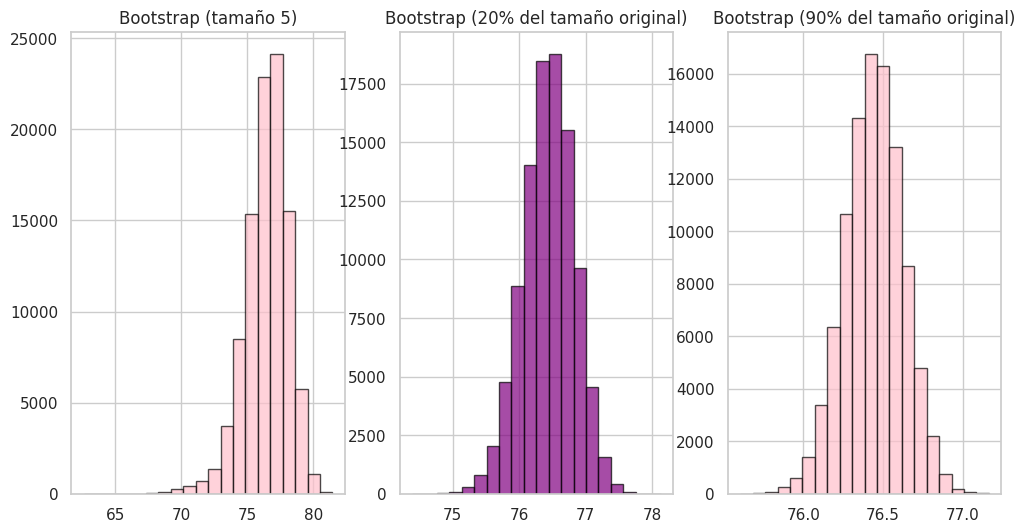

In [ ]:
# 4. Graficar histogramas de los resultados de bootstrap
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(resamples_a, bins=20, color='pink',edgecolor='black', alpha=0.7)
plt.title('Bootstrap (tamaño 5)')

plt.subplot(1, 3, 2)
plt.hist(resamples_b, bins=20,color='purple', edgecolor='black', alpha=0.7)
plt.title('Bootstrap (20% del tamaño original)')

plt.subplot(1, 3, 3)
plt.hist(resamples_c, bins=20,color='pink', edgecolor='black', alpha=0.7)
plt.title('Bootstrap (90% del tamaño original)')

plt.show()

In [ ]:
# 5. Obtener asimetría y curtosis de cada muestra
asym_a, kurt_a = pd.Series(resamples_a).skew(), pd.Series(resamples_a).kurt()
asym_b, kurt_b = pd.Series(resamples_b).skew(), pd.Series(resamples_b).kurt()
asym_c, kurt_c = pd.Series(resamples_c).skew(), pd.Series(resamples_c).kurt()

# 6. Comparar asimetría y curtosis
print(f'Asimetría y Curtosis:')
print(f'a) Asimetría: {asym_a}, Curtosis: {kurt_a}')
print(f'b) Asimetría: {asym_b}, Curtosis: {kurt_b}')
print(f'c) Asimetría: {asym_c}, Curtosis: {kurt_c}')


Asimetría y Curtosis:
a) Asimetría: -0.8489286042645109, Curtosis: 1.9951797452589735
b) Asimetría: -0.18672933503660566, Curtosis: 0.09813720946816984
c) Asimetría: -0.09858617632102334, Curtosis: 0.040737362137122535


**INTERPRETACIÓN**

La técnica de Boostrap fue empleada con la finalidad de obtener distintas muestras a partir de la muestra presentada en el dataset original.
Tras los muestreos se obtuvieron **distribuciones similares** a la normal sobretodo al aumentar el  porcentaje de aumento
Lo cual nos lleva a determinar que las muestras hay sido suficiente y no están sesgadas.

#**ERROR ESTÁNDAR**

In [ ]:
le_f= df['le_f']
means = []

for i in range(100_000):
  sample = le_f.sample(n=50, replace=True)
  means.append(sample.mean())

serie_means= pd.Series(means)

In [ ]:
print(f'Error estandar: {serie_means.std()}')

Error estandar: 0.5280319775107392


In [ ]:
print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

Valor mínimo: 73.320398
Valor máximo: 78.494066
Rango: 5.173668000000006


<Axes: >

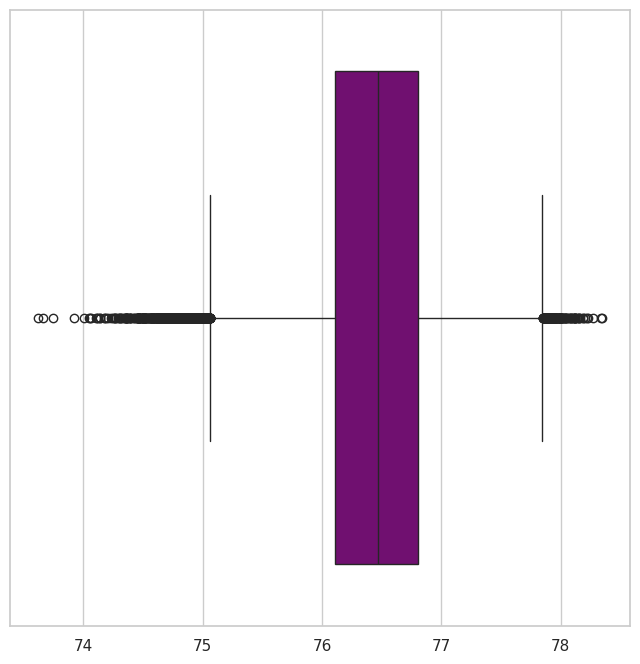

In [ ]:
sns.boxplot(serie_means,orient='h', color="purple")

**INTERPRETACIÓN:** El resultado del error estándar, 0.52, representa cuánto varían los datos respecto a la media. Dado que el rango es 5, el error estándar no es tan significativo, pues es muy pequeño el valor

#**INTERVALOS DE CONFIANZA**

In [ ]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)
print(limite_inferior)
print(limite_superior)

75.3439571
77.41081915000001


In [ ]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {le_f.mean()} < {limite_superior}')


Intervalo de 95% confianza de la media: 75.3439571 < 76.44134632034633 < 77.41081915000001


In [ ]:
mean_of_intervals = ((le_f.mean() - limite_inferior) + (limite_superior - le_f.mean())) / 2
print(f'Intervalo de 95% confianza de la media: {le_f.mean()} +/- {mean_of_intervals}')

Intervalo de 95% confianza de la media: 76.44134632034633 +/- 1.0334310250000058


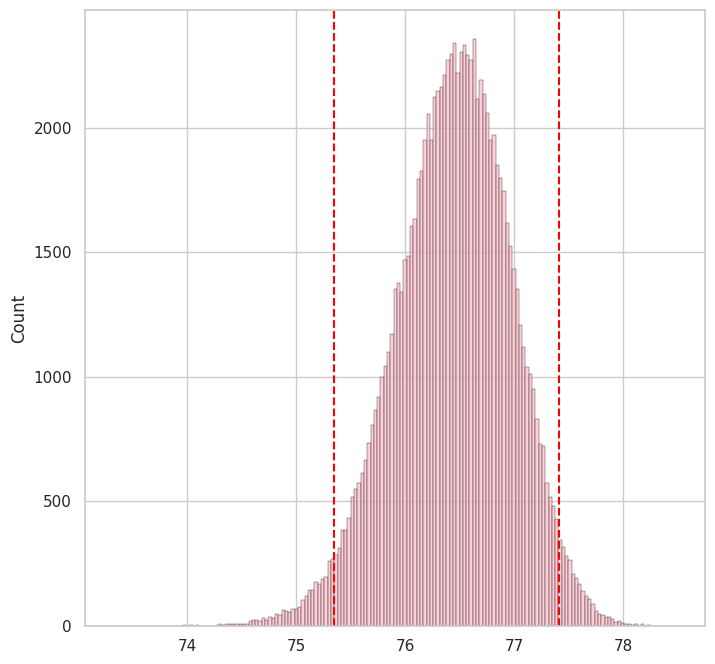

In [ ]:
#Creando el histograma con sns.histplot
sns.histplot(serie_means, kde=False, color='pink',edgecolor='black')

# Añadiendo las líneas verticales para los límites
plt.axvline(x=limite_inferior, color='red', linestyle='--')
plt.axvline(x=limite_superior, color='red', linestyle='--')

# Mostrando el gráfico
plt.show()

**INTERPRETACIÓN:** Con un nivel de confianza del 95%, se espera que el valor medio se encuentre en el intervalo de confianza. Este intervalo de confianza va desde **75.3439571 < 76.44134632034633 < 77.41081915000001**

#**ENTRENAMIENTO**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['le_f', 'gpi']]#Variables Independientes
y = df['mmr']# Variable Dependiente
print(X)
print(y)


        le_f    gpi
0    78.9268  1.820
1    79.0880  0.000
2    75.9615  0.000
3    74.0447  0.000
4    67.8569  1.952
..       ...    ...
457  73.5513  0.000
458  76.4032  2.024
459  79.2583  1.782
460  72.3958  0.000
461  75.2072  2.757

[462 rows x 2 columns]
0       53.0
1       50.0
2       77.0
3       59.0
4      234.0
       ...  
457    120.0
458     67.0
459     17.0
460     68.0
461    125.0
Name: mmr, Length: 462, dtype: float64


In [ ]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [ ]:
lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression()

In [ ]:
lr.score(X_test, y_test)

0.6111450121145816

In [ ]:
lr_2 = LinearRegression()
lr_2.fit(X, y)

LinearRegression()

In [ ]:
lr_2.score(X, y)

0.6075372499683702

#**VALIDACIÓN CRUZADA**

In [ ]:
X = df[['le_f', 'gpi']]#Variables Independientes
y = df['mmr']# Variable Dependiente

In [ ]:
lr = LinearRegression()

In [ ]:
scores = cross_validate(lr, X, y, scoring='r2')
scores

{'fit_time': array([0.00655627, 0.00458884, 0.00481534, 0.00310826, 0.00275898]),
 'score_time': array([0.00356817, 0.00253201, 0.00296974, 0.00162983, 0.0015049 ]),
 'test_score': array([0.73563747, 0.63327481, 0.54813419, 0.56223422, 0.49670879])}

Esta línea imprime la media y la desviación estándar de los puntajes de prueba obtenidos durante la validación cruzada.

In [ ]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.595 +/- 0.083


**INTERPRETACIÓN**

El resultado final muestra que el modelo tiene un R² promedio de aproximadamente "0.595" con una desviación estándar de "0.083". Esto significa que, en promedio, el modelo explica el "59%" de la variabilidad en los niveles de mmr, con una variabilidad de "8.3%" en este rendimiento a través de los diferentes pliegues de la validación cruzada.

#**PROCESAMIENTO DE LENGUAJE NATURAL**

*Dado que el dataset trabajado en este proyecto posee estadísticas de población y feminicidios, no se presta a realizar un análisis de lenguaje natural con NLTK de Python.*

# **CONCLUSIÓN DE PROYECTO**




El tema de los feminicidios en Latinoamérica, especialmente en México, es una preocupación cada vez más urgente en la sociedad contemporánea. La violencia contra las mujeres es una realidad que afecta a comunidades en todo el mundo, y comprender sus patrones es fundamental para abordar este problema de manera efectiva.

Este proyecto se centró en **explorar y analizar las relaciones entre diversas variables relacionadas con la violencia de género en América Latina**. A través de métodos estadísticos y visualizaciones de datos, se buscó identificar patrones y correlaciones significativas.

Se destacaron algunas correlaciones evidentes pero importantes. Por ejemplo, se observó una **fuerte correlación entre la mortalidad materna y la esperanza de vida**, así como entre la **mortalidad materna y el índice global de paz**. Estos hallazgos muestran la compleja interconexión entre la violencia de género, la salud materna y la estabilidad social en la región.

**Estos resultados sugieren la necesidad de implementar medidas integrales que promuevan la paz y la seguridad en la sociedad como un todo**, con el objetivo de mejorar la salud y el bienestar de las mujeres latinoamericanas. Esto implica la **adopción de estrategias y políticas específicas que aborden los indicadores clave de paz global**, como la reforma del sistema judicial, la reducción de la violencia armada y el fortalecimiento de las instituciones de seguridad.